In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [50]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [51]:
X = data.data
y = data.target

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [56]:
y_pred = lr.predict(X_test)

In [57]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 score", r2_score(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953252


In [58]:
from sklearn.linear_model import Ridge

rd = Ridge(alpha=1000)

In [59]:
rd.fit(X_train, y_train)

Ridge(alpha=1000)

In [60]:
print(rd.coef_)
print(rd.intercept_)

[ 0.25917884  0.05634256  0.77491397  0.60826675  0.23265473  0.18351619
 -0.51255843  0.52541203  0.73278048  0.52702311]
151.8346664053035


In [61]:
y_pred = rd.predict(X_test)

In [62]:
print("R2 score", r2_score(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score 0.0022195569714815733
RMSE 70.16664147369264


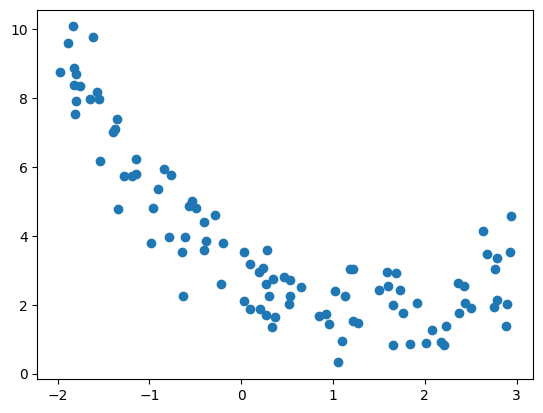

In [63]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

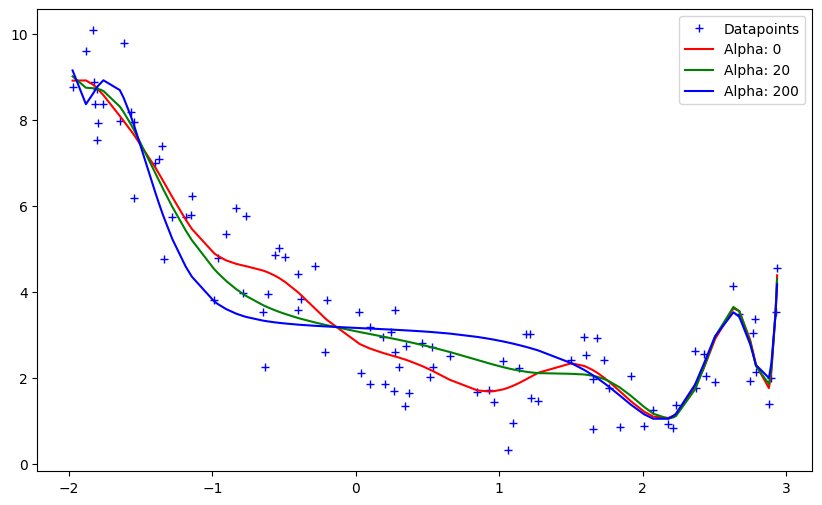

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()